## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

In [1]:
# Import the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import csv file

df = pd.read_csv('datasets/office_episodes.csv')

## Exploratory Data Analysis

Create a matplotlib scatter plot of the data that contains the following attributes:

* Each episode's episode number plotted along the x-axis
* Each episode's viewership (in millions) plotted along the y-axis
* A color scheme reflecting the scaled ratings (not the regular ratings) of each episode, such that:
    * Ratings < 0.25 are colored "red"
    * Ratings >= 0.25 and < 0.50 are colored "orange"
    * Ratings >= 0.50 and < 0.75 are colored "lightgreen"
    * Ratings >= 0.75 are colored "darkgreen"
* A sizing system, such that episodes with guest appearances have a marker size of 250 and episodes without are sized 25
* A title, reading "Popularity, Quality, and Guest Appearances on the Office"
* An x-axis label reading "Episode Number"
* A y-axis label reading "Viewership (Millions)"

In [3]:
# Creating list for colors
cols = []

for ind, row in df.iterrows():
    if row['scaled_ratings'] < 0.25:
        cols.append('red')  
    elif (row['scaled_ratings'] >= 0.25) & (row['scaled_ratings'] < 0.50):
        cols.append('orange')
    elif (row['scaled_ratings'] >= 0.50) & (row['scaled_ratings'] < 0.75):
        cols.append('lightgreen')
    else:
        cols.append('darkgreen')

In [4]:
# Creating list for sizes
size = []

for ind, row in df.iterrows():
    if row['has_guests'] == True:
        size.append(250)
    else:
        size.append(25)


In [5]:
df['size'] = size
df['color'] = cols

non_guest_df = df[df['has_guests'] == False]
with_guest_df = df[df['has_guests'] == True]

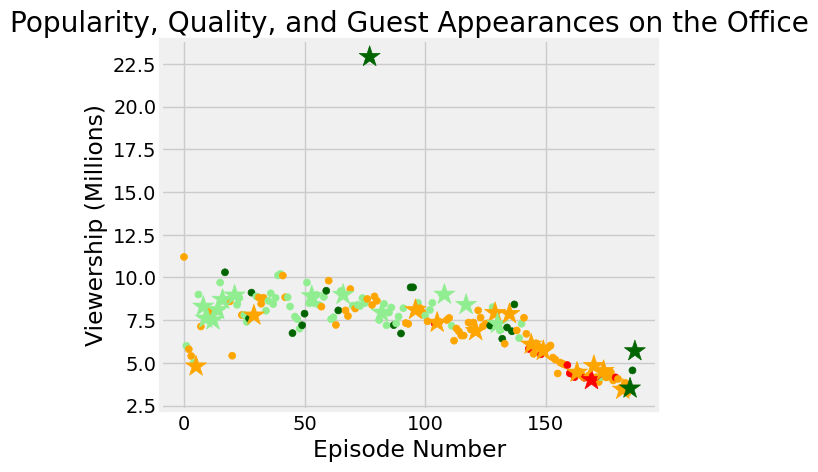

In [6]:
# Visualization
fig = plt.figure()

plt.style.use('fivethirtyeight')

plt.scatter(x = non_guest_df['episode_number'],
            y = non_guest_df['viewership_mil'],
            c = non_guest_df['color'],
           s = non_guest_df['size'])

plt.scatter(x = with_guest_df['episode_number'],
            y = with_guest_df['viewership_mil'],
            c = with_guest_df['color'],
           s = with_guest_df['size'],
           marker = '*')

plt.title("Popularity, Quality, and Guest Appearances on the Office")
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")

plt.show()



Provide the name of one of the guest stars (hint, there were multiple!) who was in the most watched Office episode. Save it as a string in the variable top_star (e.g. top_star = "Will Ferrell").

In [7]:
# Find out the guest stars in the most viewed episode:
df[df['viewership_mil'] == df['viewership_mil'].max()]

,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings,size,color
77,77,5,Stress Relief,Dwight's too-realistic fire alarm gives Stanle...,9.7,8170,22.91,60,2009-02-01,"Cloris Leachman, Jack Black, Jessica Alba",Jeffrey Blitz,Paul Lieberstein,True,0.96875,250,darkgreen


In [8]:
# Print Top Star
top_star = 'Jack Black'